Demonstartion of project1 code for single neuron model and single neuron training

In [376]:
using Pkg
#Pkg.activate("..") # you may need to change the path to point to wherever you're installing packages
import Pkg; Pkg.add("Revise")
using Revise
import Pkg; Pkg.add("Plots")
Pkg.add("Flux")
using Flux
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


Including/Adding the code files into the notebook

In [342]:
include("single_neuron_training.jl")
include("single_neuron_model.jl")
include("generate_data.jl")
include("plot_models.jl")

plot_classifier (generic function with 1 method)

Generating regression and classification data: inputs, targets and a single datapoint example

In [434]:
#regression data
lr_data = generate_regression_data(10, 1)
lr_inputs = lr_data[1]
lr_targets = lr_data[2]
lr_data_point = lr_inputs[1, :]

#classification data
cl_data = generate_classification_data(10,2)
cl_inputs = cl_data[1]
cl_targets = cl_data[2]
cl_data_point = cl_inputs[1, :]


2-element Vector{Float64}:
  0.5220185654945189
 -0.1471816077641906

Initializing linear model  for linear regression and sigmoid model for logistic classification

In [435]:
# regression model 
lr_model = LinearNeuron(1)
display(lr_model)
#classification model
cl_model = SigmoidNeuron(2)
display(cl_model)


Neuron([-0.36053998281914956], 0.4372633361240367, linear_activation, linear_derivative)

Neuron([0.9862795515625877, 0.2799648154882023], 0.05340659073248631, sigmoid_activation, sigmoid_derivative)

Testing the two predict functions on both linear regression and logistic classification data. Both work as expected 

In [436]:
#predict - a set of inputs 
lr_pred = predict(lr_model, lr_inputs)
cl_pred = predict(cl_model, cl_inputs)

display(lr_pred)
display(cl_pred)

10-element Vector{Real}:
 0.24967190864676087
 0.33979015874287327
 0.6116473721063278
 0.35722015249627764
 0.680043664377889
 0.0999026745765052
 0.1718375827549567
 0.3805897626401706
 0.165042177223666
 0.25717240751532666

10-element Vector{Real}:
 0.6287964791236709
 0.7995348616465422
 0.6286331200166618
 0.6169569896575096
 0.679661598203071
 0.678852612223584
 0.7316632100409839
 0.42818998160520244
 0.6621447584809032
 0.6019082525089489

In [437]:
#predict with a single datapoint
display(predict(lr_model, lr_data_point))
display(predict(cl_model, cl_data_point))


0.24967190864676087

0.6287964791236709

Testing the MSE loss function and accuracy function on both regression and classification models

In [438]:
#MSE --regression
lr_loss = MSE(lr_pred, lr_targets)
display(lr_loss)

#classification accuracy
cl_accuracy = accuracy(cl_pred, cl_targets)

display(cl_accuracy)

0.2422400345663191

0.6

Testing the gradient function

In [439]:
lr_gradient = gradient(lr_model, lr_inputs, lr_targets)
cl_gradient = gradient(cl_model, cl_inputs, cl_targets)

display(lr_gradient)
display(cl_gradient)


2-element Vector{Float64}:
 -5.155432029891247
 -7.577355172337748

3-element Vector{Float64}:
 -0.07924308790820168
  0.1337644256076856
  1.5529484221985916

In [440]:
include("single_neuron_training.jl")

train! (generic function with 1 method)

Testing the update and train functions on both regression and classification models

In [441]:
#weights before update
display(lr_model.weights)
update!(lr_model, lr_gradient, 5)
#weights after update
display(lr_model.weights)

1-element Vector{Float64}:
 -0.36053998281914956

1-element Vector{Float64}:
 25.416620166637088

Testing the train function

Plotting the loss over the course of training iterations

20-element Vector{Any}:
 0.012204252413286291
 0.012204252412635183
 0.012204252412242137
 0.01220425241200486
 0.012204252411861623
 0.012204252411775158
 0.012204252411722958
 0.012204252411691452
 0.01220425241167243
 0.01220425241166095
 0.012204252411654015
 0.012204252411649836
 0.012204252411647304
 0.012204252411645775
 0.01220425241164486
 0.012204252411644302
 0.012204252411643971
 0.012204252411643768
 0.012204252411643645
 0.012204252411643569

20-element Vector{Float64}:
 0.012204252413286291
 0.012204252412635183
 0.012204252412242137
 0.01220425241200486
 0.012204252411861623
 0.012204252411775158
 0.012204252411722958
 0.012204252411691452
 0.01220425241167243
 0.01220425241166095
 0.012204252411654015
 0.012204252411649836
 0.012204252411647304
 0.012204252411645775
 0.01220425241164486
 0.012204252411644302
 0.012204252411643971
 0.012204252411643768
 0.012204252411643645
 0.012204252411643569

20-element Vector{Float64}:
 0.012204252413286291
 0.012204252412635183
 0.012204252412242137
 0.01220425241200486
 0.012204252411861623
 0.012204252411775158
 0.012204252411722958
 0.012204252411691452
 0.01220425241167243
 0.01220425241166095
 0.012204252411654015
 0.012204252411649836
 0.012204252411647304
 0.012204252411645775
 0.01220425241164486
 0.012204252411644302
 0.012204252411643971
 0.012204252411643768
 0.012204252411643645
 0.012204252411643569

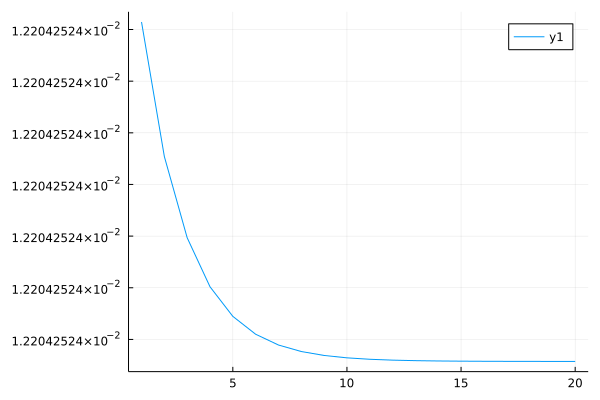

In [445]:
results = train!(lr_model, lr_inputs,lr_targets,20,0.05)
lr_losses = results[1]


lr_gradients = results[2]
lr_parameters = results[3]

plot([lr_losses])


Plotting the models, 
We tried different Hyperparameters and we got different results each time sometimes the loss and accuracy did not improve

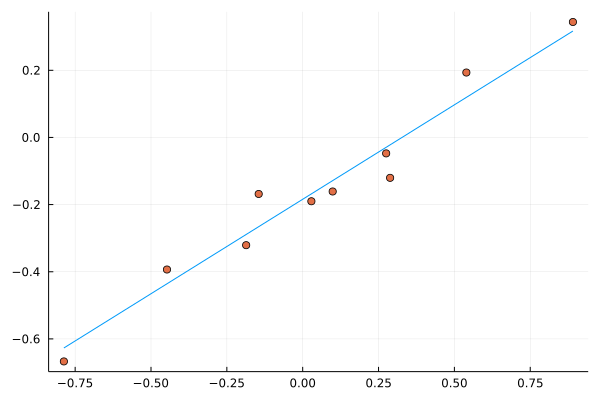

In [374]:
#regressor model
plot_regressor(lr_model, lr_inputs, lr_targets)

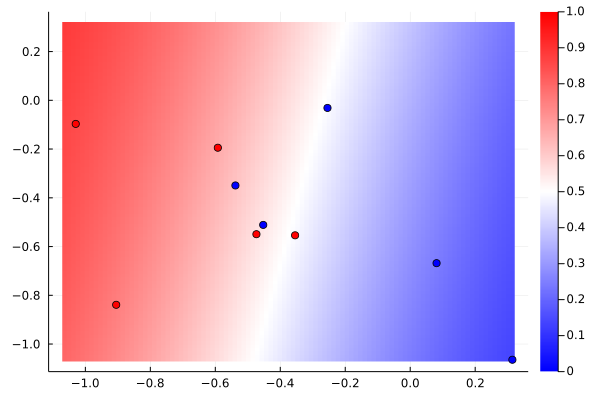

In [375]:
#classifier model 
plot_classifier(cl_model, cl_inputs, cl_targets)
